In [4]:
import pandas as pd
import geopandas as gpd

info_df = pd.read_csv("BUILDING_HISTORIC_20250708.csv")
info_df["BIN"] = info_df["BIN"].astype("Int64")

historic_gdf = gpd.read_file("building_historic.shp")
historic_gdf["BIN"] = historic_gdf["BIN"].astype("Int64")

merged_gdf = historic_gdf.merge(info_df, on="BIN", how="left")
merged_gdf = merged_gdf.to_crs(epsg=4326)
merged_gdf.head()

NAME_x      BIN  HEIGHTROOF LSTMODDATE  LSTSTATYPE  DOITT_ID_x  CNSTRCT_YR  \
0   None  3209384         NaN 2005-01-14  Demolition           0      1920.0   
1   None  4155924         NaN 2005-01-10  Demolition           0      2005.0   
2   None  5028539         NaN 2005-01-13  Demolition           0         0.0   
3   None  3000000         NaN 2005-01-12  Demolition           0      1920.0   
4   None  3000000         NaN 2005-01-12  Demolition           0      1920.0   

   DEMOL_YR  SHAPE_AREA_x  SHAPE_LEN  ... CONSTRUCTION YEAR DEMOLITION YEAR  \
0    2000.0           0.0        0.0  ...            1920.0          2000.0   
1    2004.0           0.0        0.0  ...            2005.0          2004.0   
2    2002.0           0.0        0.0  ...               0.0          2002.0   
3    2002.0           0.0        0.0  ...            1930.0          2013.0   
4    2002.0           0.0        0.0  ...            1931.0          2004.0   

  FEATURE CODE      GEOM SOURCE  GROUND ELEVATION HEIGHT ROOF  \
0          NaN   Other (Manual)               NaN         NaN   
1          NaN  Photogrammetric               NaN         NaN   
2          NaN  Photogrammetric               NaN         NaN   
3          NaN  Photogrammetric               NaN        11.0   
4          NaN   Other (Manual)               NaN         NaN   

               LAST_EDITED_DATE LAST_STATUS_TYPE MAP PLUTO BBL  Shape__Length  
0  01/14/2005 12:00:00 AM +0000       Demolition           NaN      31.797263  
1  01/10/2005 12:00:00 AM +0000       Demolition           NaN      64.183635  
2  01/13/2005 12:00:00 AM +0000       Demolition           NaN      52.818495  
3  08/20/2013 12:00:00 AM +0000       Demolition           NaN      21.851310  
4  10/03/2008 12:00:00 AM +0000       Demolition           NaN      64.656853  

[5 rows x 33 columns]

In [ ]:
import folium

m = folium.Map(location=[40.7, -73.95], zoom_start=11)

subset_gdf = merged_gdf.sample(n=2000, random_state=42)

for col in subset_gdf.columns:
    if col != "geometry":
        subset_gdf[col] = subset_gdf[col].astype(str)

folium.GeoJson(
    subset_gdf,
    name="Sampled Historic Buildings",
    tooltip=folium.GeoJsonTooltip(
        fields=["NAME_x", "CONSTRUCTION YEAR", "LAST_STATUS_TYPE"]
    ),
).add_to(m)

m.save("historic_buildings_sampled.html")
m

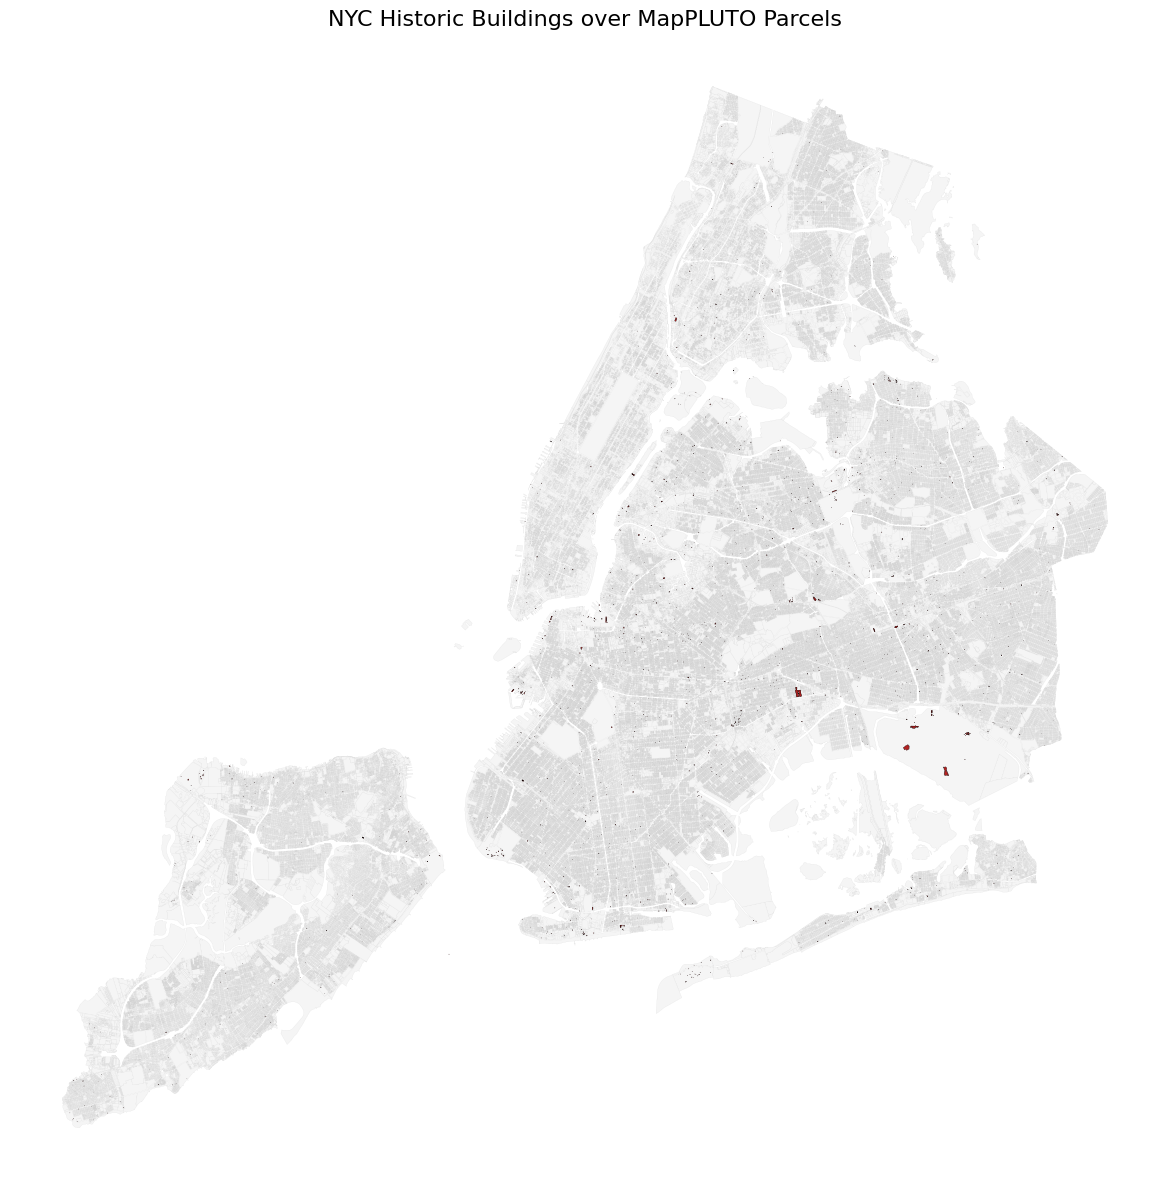

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

subset_gdf = merged_gdf.sample(n=2000, random_state=42)

mappluto_gdf = gpd.read_file("MapPLUTO.shp")

subset_gdf = subset_gdf.to_crs(epsg=4326)
mappluto_gdf = mappluto_gdf.to_crs(epsg=4326)

fig, ax = plt.subplots(figsize=(12, 12))

mappluto_gdf.plot(ax=ax, color="whitesmoke", edgecolor="lightgray", linewidth=0.1)

subset_gdf.plot(ax=ax, color="firebrick", edgecolor="black", linewidth=0.2)

plt.title("NYC Historic Buildings over MapPLUTO Parcels", fontsize=16)
plt.axis("off")
plt.tight_layout()

plt.savefig("historic_buildings_on_mappluto.png", dpi=300)
plt.show()

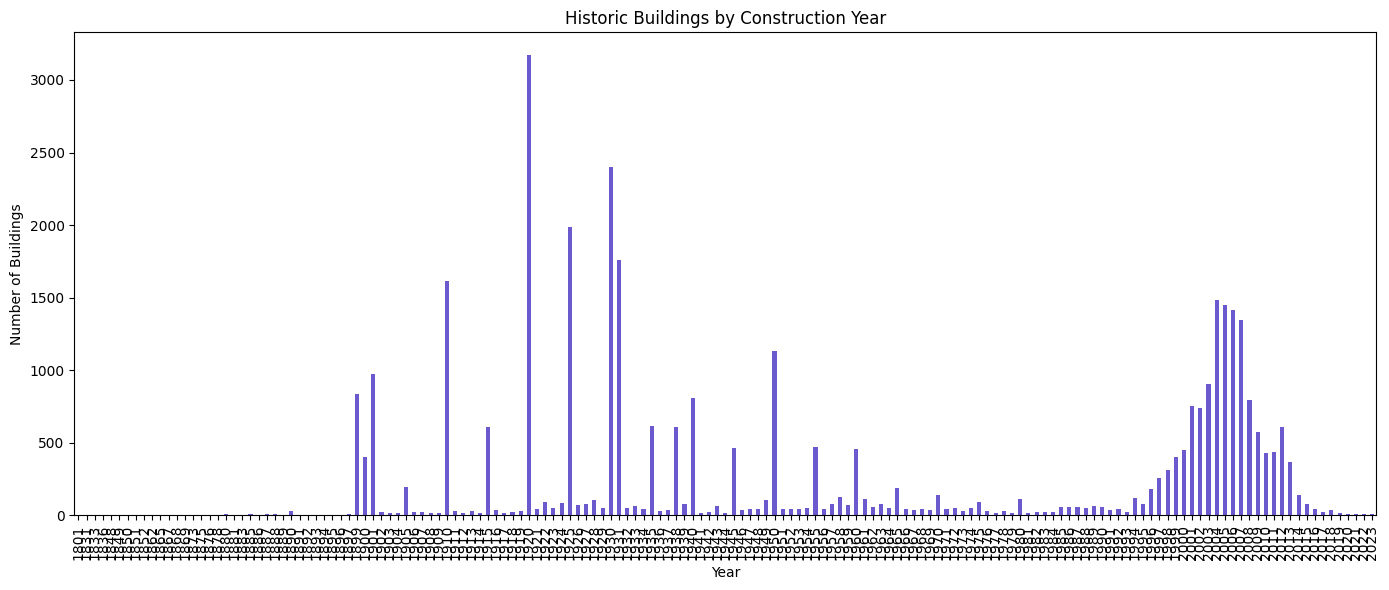

In [8]:
import matplotlib.pyplot as plt

df = info_df.copy()
df = df[df["CONSTRUCTION YEAR"].notnull() & (df["CONSTRUCTION YEAR"] > 1800)]
year_counts = df["CONSTRUCTION YEAR"].astype(int).value_counts().sort_index()

plt.figure(figsize=(14, 6))
year_counts.plot(kind="bar", color="slateblue")
plt.title("Historic Buildings by Construction Year")
plt.xlabel("Year")
plt.ylabel("Number of Buildings")
plt.tight_layout()
plt.show()

In [2]:
df2 = info_df[(info_df["CNSTRCT_YR"].notnull()) & (info_df["HEIGHTROOF"].notnull())]
df2["CNSTRCT_YR"] = df2["CNSTRCT_YR"].astype(int)

avg_height = df2.groupby("CNSTRCT_YR")["HEIGHTROOF"].mean()

plt.figure(figsize=(12, 5))
avg_height.plot()
plt.title("Average Roof Height by Construction Year")
plt.xlabel("Year")
plt.ylabel("Average Roof Height (feet)")
plt.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'info_df' is not defined